In [1]:
#Sebelum memulai project ini, terlebih dahulu kita baca dulu datasetnya
##dengan read.csv()
df_loan <- read.csv('loan_disbursement.csv', stringsAsFactors = F)
#Kemudian, lihat isi datanya secara sekilas beserta jumlah barisnya dengan glimpse()
##dan baca 5 dataset teratasnya jika diperlukan
dplyr::glimpse(df_loan)
head(df_loan)

Rows: 9,754
Columns: 5
$ loan_id      <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,...
$ tanggal_cair <chr> "2020-01-06", "2020-01-06", "2020-01-06", "2020-01-06"...
$ cabang       <chr> "AA", "AA", "AA", "AA", "AA", "AA", "AB", "AB", "AB", ...
$ agen         <chr> "AA-1", "AA-1", "AA-1", "AA-2", "AA-2", "AA-2", "AB-1"...
$ amount       <int> 320000, 440000, 200000, 430000, 360000, 220000, 320000...


loan_id,tanggal_cair,cabang,agen,amount
1,2020-01-06,AA,AA-1,320000
2,2020-01-06,AA,AA-1,440000
3,2020-01-06,AA,AA-1,200000
4,2020-01-06,AA,AA-2,430000
5,2020-01-06,AA,AA-2,360000
6,2020-01-06,AA,AA-2,220000


In [21]:
#Selanjutnya, kita filter datanya hanya untuk yang bulan Mei saja
##sebelumnya, load dulu library dplyr nya yah :)
library(dplyr)
df_loan_mei <- df_loan %>% filter(tanggal_cair >= '2020-05-01', tanggal_cair <= '2020-05-31')%>%group_by(cabang) %>%
summarise(total_amount = sum(amount))
df_loan_mei

cabang,total_amount
AA,75710000
AB,81440000
AC,83990000
AD,76080000
AE,54200000
AF,68040000
AG,74080000
AH,73840000
AI,46640000
AJ,43580000


In [20]:
#Selanjutnya, kita akan coba tampilkan 5 cabang terbesar dari df_loan_mei
##sebelumnya, import dulu library scales nya supaya lebih mudah nantinya :)
library(scales)
df_loan_mei %>% arrange(desc(total_amount)) %>% mutate(total_amount = comma(total_amount)) %>% head(5)

cabang,total_amount
AC,"83,990,000"
AB,"81,440,000"
AD,"76,080,000"
AA,"75,710,000"
AG,"74,080,000"


In [19]:
#Setelah menampilkan top 5 nya
##Sekarang gilirannya untuk menampilkan top bottom dari df_loan_mei
df_loan_mei %>% arrange(total_amount) %>% mutate(total_amount = comma(total_amount)) %>% head(5)

cabang,total_amount
AV,"30,280,000"
AS,"31,740,000"
AT,"34,840,000"
AU,"35,610,000"
AO,"39,120,000"


In [18]:
#Karena di data tidak tersedia data untuk umur cabangnya,
##maka sekarang saatnya untuk menghitung umur cabang
##dengan cara menghitung berapa lama sejak tanggal cair pertama hingga bulan Mei
##sebelumnya, cari dulu tanggal pertama cairnya, lalu asumsikan tanggal batas cairnya adalah tengah bulan
df_cabang_umur <- df_loan %>% group_by(cabang) %>% summarise(pertama_cair = min(tanggal_cair)) %>% mutate(umur = as.numeric(
as.Date('2020-05-15') - as.Date(pertama_cair)) %/% 30)
df_cabang_umur

cabang,pertama_cair,umur
AA,2020-01-06,4
AB,2020-01-06,4
AC,2020-01-06,4
AD,2020-01-06,4
AE,2020-02-03,3
AF,2020-02-03,3
AG,2020-02-03,3
AH,2020-02-03,3
AI,2020-03-02,2
AJ,2020-03-02,2


In [17]:
#Supaya bisa membandingkan antara umur cabang dengan total amount nya,
##kita akn menggabungkan df_cabang_umur dan df_loan_mei
df_loan_mei_umur <- df_cabang_umur %>% inner_join(df_loan_mei, by = 'cabang')
df_loan_mei_umur

cabang,pertama_cair,umur,total_amount
AA,2020-01-06,4,75710000
AB,2020-01-06,4,81440000
AC,2020-01-06,4,83990000
AD,2020-01-06,4,76080000
AE,2020-02-03,3,54200000
AF,2020-02-03,3,68040000
AG,2020-02-03,3,74080000
AH,2020-02-03,3,73840000
AI,2020-03-02,2,46640000
AJ,2020-03-02,2,43580000


Warning message:
"package 'ggplot2' was built under R version 3.6.3"

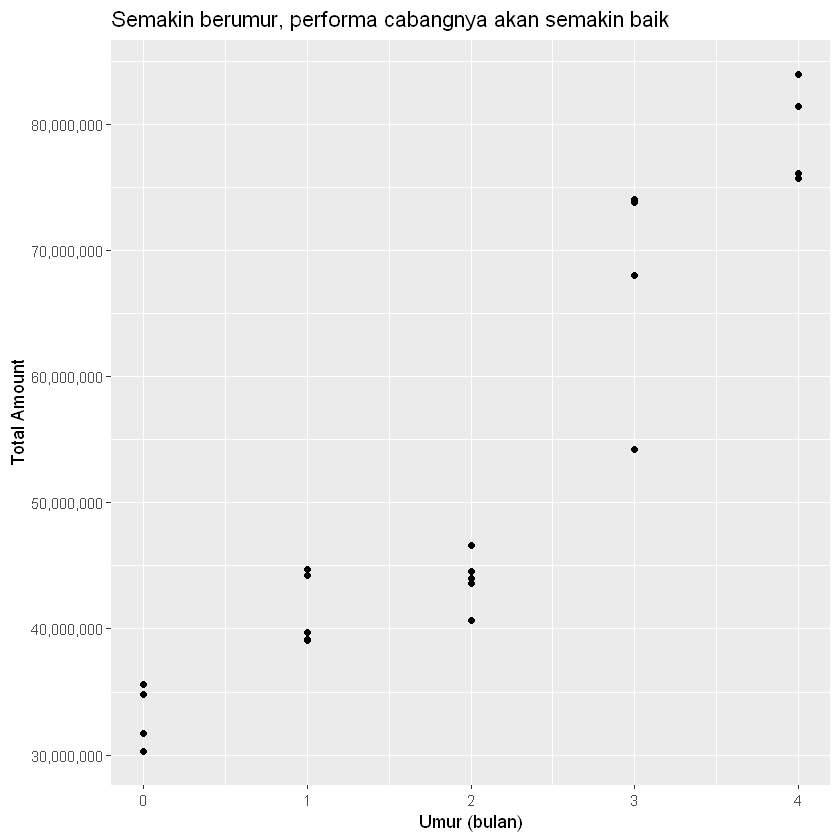

In [7]:
#Supaya lebih enak menganalisanya,
##kita akan buat plot relasi antara umur dan performa khusus untuk bulan Mei saja
##sebelumnya, jangan lupa untuk panggil library ggplot2 nya
library(ggplot2)
ggplot(df_loan_mei_umur, aes(x = umur, y = total_amount)) + geom_point() + scale_y_continuous(labels = scales::comma) +
labs(title = "Semakin berumur, performa cabangnya akan semakin baik",
    x = "Umur (bulan)",
    y = "Total Amount")

In [16]:
#Kemudian, kita akan mencoba mencari cabang dengan performa rendah untuk setiap umur
##diasumsikan, performa suatu cabang rendah jika performanya kurang dari (QI - IQR)
df_loan_mei_flag <- df_loan_mei_umur %>% group_by(umur) %>% mutate(Q1 = quantile(total_amount, 0.25),
                                                               Q3 = quantile(total_amount, 0.75),
                                                              IQR = Q3 - Q1) %>% mutate(flag =
                                                                                     ifelse(total_amount < (Q1 - IQR),
                                                                                           'rendah', 'baik'))
df_loan_mei_flag %>% filter(flag=='rendah') %>% mutate_if(is.numeric, funs(comma))

`mutate_if()` ignored the following grouping variables:
Column `umur`


cabang,pertama_cair,umur,total_amount,Q1,Q3,IQR,flag
AE,2020-02-03,3,"54,200,000","64,580,000","73,900,000","9,320,000",rendah
AL,2020-03-02,2,"40,650,000","43,580,000","44,590,000","1,010,000",rendah


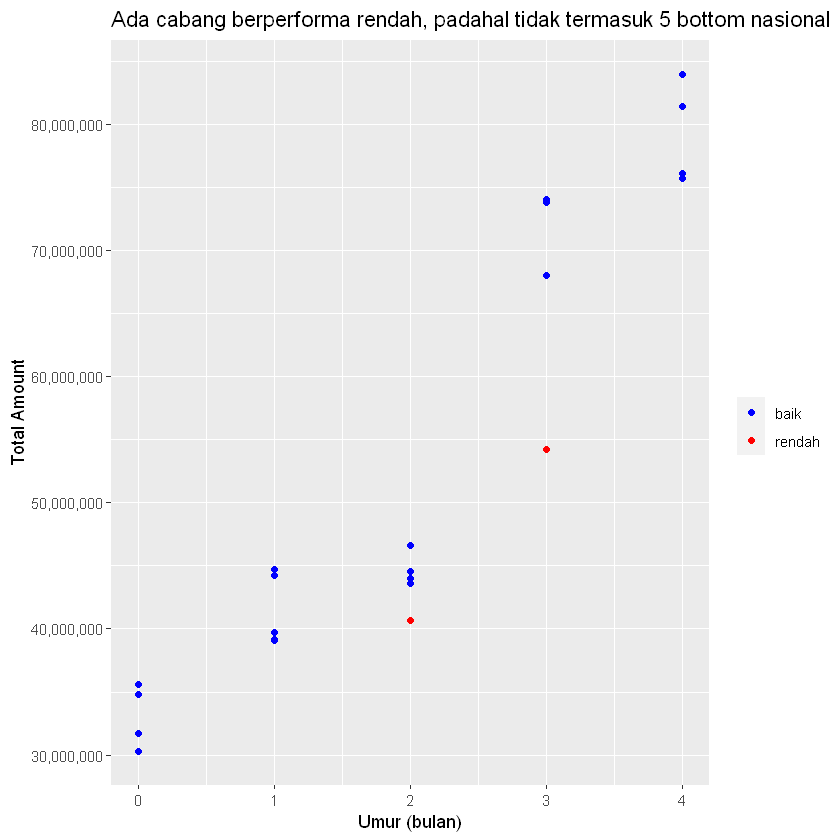

In [9]:
#Setelah ketemu, kembali lagi ke scatterplot yang tadi, lalu buat lagi
##dengan menandai cabang yang rendah tadi dengan warna merah
library(ggplot2)
ggplot(df_loan_mei_flag, aes(x = umur, y = total_amount)) + geom_point(aes(color = flag)) +
scale_color_manual(breaks = c("baik", "rendah"),
                  values = c("blue", "red")) +
scale_y_continuous(labels = scales::comma) +
labs(title = "Ada cabang berperforma rendah, padahal tidak termasuk 5 bottom nasional",
    color = "",
    x = "Umur (bulan)",
    y = "Total Amount")

In [15]:
#Kita akan mencoba menganalisa kenapa cabang-cabang tersebut performanya rendah di bulan Mei
##cabang yang kita analisis hanya yang berumur 3 bulan saja
df_loan_mei_flag %>%
filter(umur == 3) %>%
inner_join(df_loan, by = 'cabang') %>%
filter(tanggal_cair >= '2020-05-01', tanggal_cair <= '2020-05-31') %>%
group_by(cabang, flag) %>%
summarise(jumlah_hari = n_distinct(tanggal_cair),
         agen_aktif = n_distinct(agen),
         total_loan_cair = n_distinct(loan_id),
         avg_amount = mean(amount),
         total_amount = sum(amount)) %>%
arrange(total_amount) %>%
mutate_if(is.numeric, funs(comma))

`summarise()` has grouped output by 'cabang'. You can override using the `.groups` argument.
`mutate_if()` ignored the following grouping variables:
Column `cabang`


cabang,flag,jumlah_hari,agen_aktif,total_loan_cair,avg_amount,total_amount
AE,rendah,21,3,175,"309,714","54,200,000"
AF,baik,21,3,225,"302,400","68,040,000"
AH,baik,21,3,241,"306,390","73,840,000"
AG,baik,21,3,241,"307,386","74,080,000"


In [14]:
#Karena nilai yang berbeda jauh hanya total_loan_cair saja,
##kita perlu memantau perbadingannya per agent
df_loan_mei_flag %>%
filter(umur == 3, flag == 'rendah') %>%
inner_join(df_loan, by = 'cabang') %>%
filter(tanggal_cair >= '2020-05-01', tanggal_cair <= '2020-05-31') %>%
group_by(cabang, agen) %>%
summarise(jumlah_hari = n_distinct(tanggal_cair),
         total_loan_cair = n_distinct(loan_id),
         avg_amount = mean(amount),
         total_amount = sum(amount)) %>%
arrange(total_amount) %>%
mutate_if(is.numeric, funs(comma))

`summarise()` has grouped output by 'cabang'. You can override using the `.groups` argument.
`mutate_if()` ignored the following grouping variables:
Column `cabang`


cabang,agen,jumlah_hari,total_loan_cair,avg_amount,total_amount
AE,AE-3,4.0,16,"310,625","4,970,000"
AE,AE-2,18.0,73,"320,274","23,380,000"
AE,AE-1,21.0,86,"300,581","25,850,000"


In [13]:
#Sebagai evaluasinya, kita akan melihat perbandingan performa agen untuk cabang yang performanya paling baik
##yaitu yang berumur 3 bulan
df_loan %>% filter(cabang == 'AH') %>% filter(tanggal_cair >= '2020-05-01', tanggal_cair <= '2020-05-31') %>%
group_by(cabang, agen)%>%summarise(jumlah_hari = n_distinct(tanggal_cair),
                                  total_loan_cair = n_distinct(loan_id),
                                  avg_amount = mean(amount),
                                  total_amount = sum(amount))%>%
arrange(total_amount) %>%
mutate_if(is.numeric, funs(comma))

`summarise()` has grouped output by 'cabang'. You can override using the `.groups` argument.
`mutate_if()` ignored the following grouping variables:
Column `cabang`


cabang,agen,jumlah_hari,total_loan_cair,avg_amount,total_amount
AH,AH-3,19.0,74.0,"303,649","22,470,000"
AH,AH-1,21.0,81.0,"301,358","24,410,000"
AH,AH-2,21.0,86.0,"313,488","26,960,000"
